# F1  Project Transer Learning

1. [Libraries](#1)
2. [Data Preparation](#2)
3. [Transfer Learning](#3)
4. [Model Training](#4)
5. [Visualization](#5)

<a id = '1'></a>
## Libraries

In [1]:
#libraries
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential

<a id = '2'></a>
## Data Preparation

In [2]:
#importing vgg16 model
from tensorflow.keras.applications import VGG16
preprocess_input = tf.keras.applications.vgg16.preprocess_input

In [3]:
#directory 
dataDir = r'C:/Users/gorke/Desktop/dataf1'

#data generating
train_datagen = ImageDataGenerator(rescale = 1./255, validation_split = 0.1, preprocessing_function = preprocess_input)
test_datagen = ImageDataGenerator(rescale = 1./255, validation_split = 0.1, preprocessing_function = preprocess_input)

#flow from dir
train_datagen = train_datagen.flow_from_directory(dataDir, target_size = (224,224), subset = 'training', batch_size= 2, class_mode = 'sparse')
test_datagen = test_datagen.flow_from_directory(dataDir, target_size = (224,224), subset = 'validation', batch_size = 2, class_mode = 'sparse')

Found 252 images belonging to 4 classes.
Found 28 images belonging to 4 classes.


<a id = '3'></a>
## Transfer Learning

In [4]:
vggModel = VGG16()

In [5]:
#model summary
vggModel.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [6]:
#type of vgg model
print(type(vggModel))

<class 'keras.engine.functional.Functional'>


In [7]:
model = Sequential()
for layer in vggModel.layers[0:-1]:
    model.add(layer)

In [8]:
#model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [9]:
for layer in model.layers:
    layer.trainable = False
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [10]:
model.add(layers.Dense(4))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

<a id = '4'></a>
## Model Training

In [11]:
#optimizer 
optimizer = tf.keras.optimizers.Adamax(learning_rate = 0.001)

#loss
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)

#model compiling
model.compile(optimizer = optimizer, loss = loss, metrics = ['accuracy'])

#model fitting 
result = model.fit(train_datagen, epochs = 30, verbose = 1, validation_data = test_datagen)

Epoch 1/30
126/126 [==============================] - 7s 38ms/step - loss: 1.6454 - accuracy: 0.2937 - val_loss: 1.7435 - val_accuracy: 0.2143
Epoch 2/30
126/126 [==============================] - 5s 36ms/step - loss: 1.3760 - accuracy: 0.3690 - val_loss: 1.5645 - val_accuracy: 0.2857
Epoch 3/30
126/126 [==============================] - 5s 36ms/step - loss: 1.2287 - accuracy: 0.4603 - val_loss: 2.0524 - val_accuracy: 0.2500
Epoch 4/30
126/126 [==============================] - 5s 36ms/step - loss: 1.1020 - accuracy: 0.5040 - val_loss: 1.5976 - val_accuracy: 0.2857
Epoch 5/30
126/126 [==============================] - 5s 36ms/step - loss: 1.0653 - accuracy: 0.5159 - val_loss: 1.9144 - val_accuracy: 0.3214
Epoch 6/30
126/126 [==============================] - 5s 36ms/step - loss: 0.9521 - accuracy: 0.6111 - val_loss: 1.5098 - val_accuracy: 0.2857
Epoch 7/30
126/126 [==============================] - 5s 36ms/step - loss: 0.9228 - accuracy: 0.6310 - val_loss: 1.6709 - val_accuracy: 0.2857

<a id = '5'></a>
## Visualization 

In [12]:
#data preparation
acc = result.history['accuracy']
val_acc = result.history['val_accuracy']
acc_loss = result.history['loss']
val_loss = result.history['val_loss']
epochs = range(1, len(acc)+1)

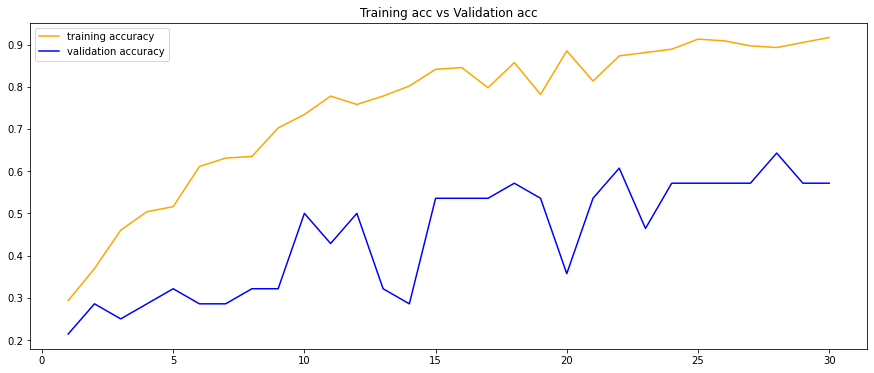

In [13]:
#plotting training accuracy and validation accuracy
plt.figure(figsize = (15,6))
plt.plot(epochs, acc, label = ('training accuracy'), color = 'orange')
plt.plot(epochs, val_acc, label = ('validation accuracy'), color = 'blue')
plt.title('Training acc vs Validation acc')
plt.legend()
plt.show()

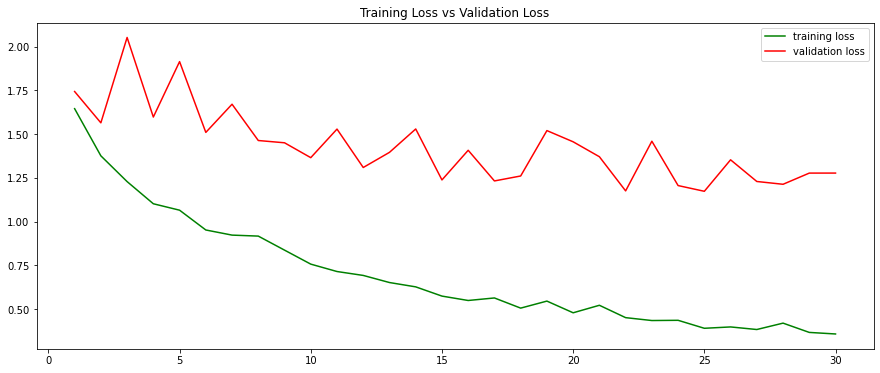

In [14]:
#plotting training loss and validation loss
plt.figure(figsize = (15,6))
plt.plot(epochs, acc_loss, label = ('training loss'), color = 'green')
plt.plot(epochs, val_loss, label = ('validation loss'), color = 'red')
plt.title('Training Loss vs Validation Loss')
plt.legend()
plt.show()